# Recommendation-Based Purchase Prediction

Loading libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Reading the data

In [41]:
df = pd.read_csv("C:/Users/USER/Downloads/online-shoppers-data.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Summary Statistics

In [42]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Information on data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Visualizations

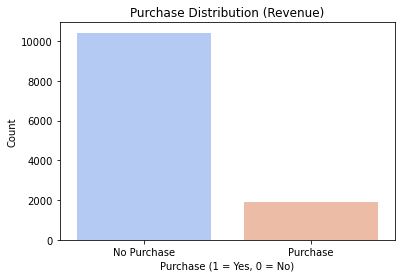

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Revenue"], palette="coolwarm")
plt.title("Purchase Distribution (Revenue)")
plt.xlabel("Purchase (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Purchase", "Purchase"])
plt.show()

This helps to identify the imbalance between the buyers and non-buyers. The conclusion is that the purchases are imbalanced and most visitors don't buy.

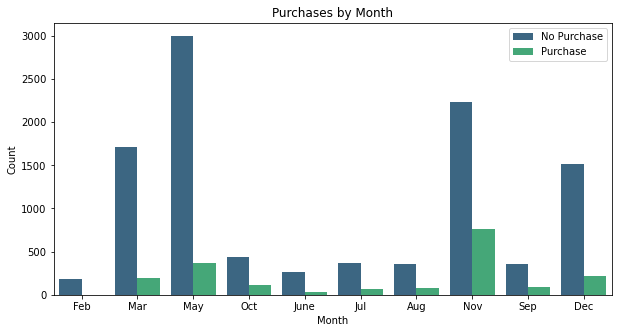

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Month"], hue=df["Revenue"], palette="viridis")
plt.title("Purchases by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(["No Purchase", "Purchase"])
plt.show()

This graph identifies the peak shopping months. The month November has got more purchases.

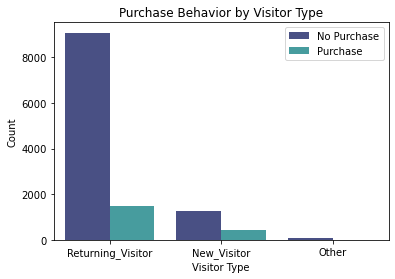

In [46]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["VisitorType"], hue=df["Revenue"], palette="mako")
plt.title("Purchase Behavior by Visitor Type")
plt.xlabel("Visitor Type")
plt.ylabel("Count")
plt.legend(["No Purchase", "Purchase"])
plt.show()

This graph gives an idea about whether the new or returning customers converts more. Returning visitors tend to purchase more than new ones.

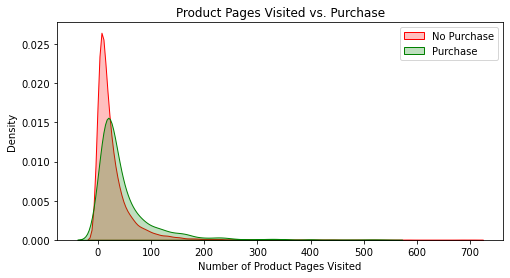

In [47]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df[df["Revenue"] == 0]["ProductRelated"], label="No Purchase", shade=True, color="r")
sns.kdeplot(df[df["Revenue"] == 1]["ProductRelated"], label="Purchase", shade=True, color="g")
plt.title("Product Pages Visited vs. Purchase")
plt.xlabel("Number of Product Pages Visited")
plt.legend()
plt.show()

This graph suggests that the users who make a purchase tend to browse significantly more product pages than those who don't.

# Data Preprocessing

Checking for missing values

In [48]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Handling Categorical values

In [49]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Month"] = label_encoder.fit_transform(df["Month"])  
df["VisitorType"] = label_encoder.fit_transform(df["VisitorType"])  
df["Weekend"] = df["Weekend"].astype(int)  
df["Revenue"] = df["Revenue"].astype(int)  

Standardize numerical columns

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration","BounceRates", "ExitRates", 
                  "PageValues", "SpecialDay"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Model Building

In [51]:
X = df.drop(columns=["Revenue"])
y = df["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
#Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8690186536901865
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.73      0.34      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



In [53]:
#Decision Tree Classifier Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8572587185725872
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2055
           1       0.57      0.57      0.57       411

    accuracy                           0.86      2466
   macro avg       0.74      0.74      0.74      2466
weighted avg       0.86      0.86      0.86      2466



In [54]:
#Random Forest Classifier Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8961881589618816
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2055
           1       0.76      0.55      0.64       411

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



In [55]:
#Support Vector Classifier
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.870235198702352
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.72      0.36      0.48       411

    accuracy                           0.87      2466
   macro avg       0.80      0.67      0.70      2466
weighted avg       0.86      0.87      0.85      2466



In [56]:
#Model Evaluation
models = {"Logistic Regression": LogisticRegression(), "Decision Tree": DecisionTreeClassifier(random_state=42),
"Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),"SVC": SVC(kernel="linear")}

model_accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

#finding the best model
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest Model: {best_model} with Accuracy: {model_accuracies[best_model]:.4f}")

Logistic Regression Accuracy: 0.8690
Decision Tree Accuracy: 0.8573
Random Forest Accuracy: 0.8962
SVC Accuracy: 0.8702

Best Model: Random Forest with Accuracy: 0.8962


# Prediction

In [57]:
random_sample = pd.DataFrame({"Administrative": [4],"Administrative_Duration": [60],"Informational": [2],
                "Informational_Duration": [25], "ProductRelated": [20], "ProductRelated_Duration": [300], "BounceRates": [0.02],
                "ExitRates": [0.05], "PageValues": [7.0], "SpecialDay": [0.0], "Month": ["Nov"], "OperatingSystems": [3],
                "Browser": [2], "Region": [1], "TrafficType": [4], "VisitorType": ["Returning_Visitor"],"Weekend": [1]})

month_encoding = LabelEncoder()
visitor_encoding = LabelEncoder()

random_sample["Month"] = month_encoding.fit_transform(random_sample["Month"])
random_sample["VisitorType"] = visitor_encoding.fit_transform(random_sample["VisitorType"])
random_sample["Weekend"] = random_sample["Weekend"].astype(int)  

scaler = StandardScaler()
random_sample_scaled = scaler.fit_transform(random_sample)

In [58]:
predicted_revenue = rf.predict(random_sample_scaled)
print(f"Predicted Revenue: {predicted_revenue[0]}")  

Predicted Revenue: 0


The prediction made from the random sample suggests that the customer won't purchase.